# Data clean approach by predicting the missing values 

# Data Cleaning and Preprocessing

In [89]:
import pandas as pd
df = pd.read_csv('dirty_data.csv')

# droping duplicates

df.drop_duplicates()
df

,Customer ID,Name,Age,Date of Birth,Email,Income Status,Mobile No,Country,Mobile Active,Email Active,City,Action,Time Spent,Transaction_Amount,Product Code,Date
0,SF282694,Patricia,40.0,1974-07-11,evaluated1847@example.com,>=50k,2.219428e+12,Senegal,0.0,1.0,Dakar,['Shared product' 'Purchase' 'Login'],06:22:00,43.71,"['CUAR6713', 'QKOT2844', 'XAXZ3838', 'OQEC0645...",2024-03-08
1,TE728273,Jae,38.0,1968-12-21,builds1944@example.org,>=50k,2.137449e+12,Algeria,0.0,0.0,Ouled Moussa,['Save for later'],21:39:38,466.27,"['WEMH5650', 'QKJY7652', 'SGIQ3300', 'ADJY3664...",2024-02-05
2,MS023187,Florrie,NaN,2003-11-13,set2066@gmail.com,<50k,5.275073e+11,Mexico,1.0,1.0,Tacámbaro de Codallos,['Home Page Visit'],22:10:35,6916.92,"['DAUY5260', 'XTYP8097', 'ZOQS0126', 'WXSG1545...",2024-03-16
3,ET367185,Roni,56.0,1965-12-24,refers2025@example.com,NaN,8.893565e+09,BDlgium,0.0,1.0,Wanze,['Shared product'],06:33:51,NaN,"['TXQG5693', 'LTPN2981', 'ONFN7108', 'BNAA2857...",2024-02-08
4,JG458278,Donald,58.0,1968-11-27,ink1817@yahoo.com,unemployed,5.582782e+11,Brazil,0.0,0.0,Xihue-Xique,['Add to cart' 'order cancel'],17:49:45,6647.11,[],2024-02-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,HQ974646,Dayle,31.0,1987-07-12,available2023@gmail.com,<50k,3.368114e+11,France,1.0,0.0,Vierzon,['Save for later'],17:35:16,2011.85,"['GLQX4238', 'HLPN8296', 'DVPT9828', 'CWNX2320...",2024-05-31
199996,LP668576,Guillermo,58.0,2006-09-02,supervisor1984@gmail.com,<50k,4.498647e+11,United Kingdom,1.0,1.0,Hucclecote,['Other' 'order cancel'],08:29:56,7210.63,[],2024-06-15
199997,BG394075,Shela,64.0,1987-01-19,honolulu2010@live.com,>=50k,3.898101e+12,North Macedonia,0.0,1.0,Struga,['order cancel'],17:35:14,NaN,"['RRDR6447', 'CEEO7453']",2024-04-11
199998,VR528159,Marguerita,16.0,2003-03-10,mls1957@example.org,<50k,9.169383e+11,India,1.0,0.0,NagXa,['Save for later' 'Add to cart'],10:39:46,43.14,"['FZAX9549', 'BWSX1001']",2024-02-14


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Customer ID         190400 non-null  object 
 1   Name                190200 non-null  object 
 2   Age                 194000 non-null  float64
 3   Date of Birth       192400 non-null  object 
 4   Email               192400 non-null  object 
 5   Income Status       189800 non-null  object 
 6   Mobile No           191200 non-null  float64
 7   Country             197200 non-null  object 
 8   Mobile Active       193200 non-null  float64
 9   Email Active        192600 non-null  float64
 10  City                195400 non-null  object 
 11  Action              190200 non-null  object 
 12  Time Spent          193800 non-null  object 
 13  Transaction_Amount  147421 non-null  float64
 14  Product Code        191200 non-null  object 
 15  Date                200000 non-nul

In [91]:
useful_df = df[['Customer ID','Email Active','Mobile Active','City','Time Spent', 'Transaction_Amount', 'Product Code']]

# Removing missing values

removing the customer whose transaction is zero throughout

ALso removing data with no cutomer ID

In [1]:
# df2 = df.groupby('Customer ID')
# df3 = df2['Transaction_Amount'].sum().reset_index()
# df3

In [112]:

# to_remove_cutomer_lst = df3[df3["Transaction_Amount"]==0]['Customer ID'].tolist()
# df = df[(~df['Customer ID'].isin(to_remove_cutomer_lst)) & (df['Customer ID'].notnull()) & (df['Transaction_Amount'].notnull())]

In [2]:
# df

# Removing Outliers

In [110]:
df['Transaction_Amount'].quantile(1)

38933.07324039676

In [122]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    print(Q1,Q3)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(lower_bound,upper_bound)
    print(df[(df[column] < lower_bound) & (df[column] > upper_bound)])
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df2 = remove_outliers(df,'Transaction_Amount')


79.17 4254.7525000000005
-6184.203750000001 10518.126250000001
Empty DataFrame
Columns: [Customer ID, Name, Age, Date of Birth, Email, Income Status, Mobile No, Country, Mobile Active, Email Active, City, Action, Time Spent, Transaction_Amount, Product Code, Date]
Index: []


Visualising Outliers

<Axes: ylabel='Transaction_Amount'>

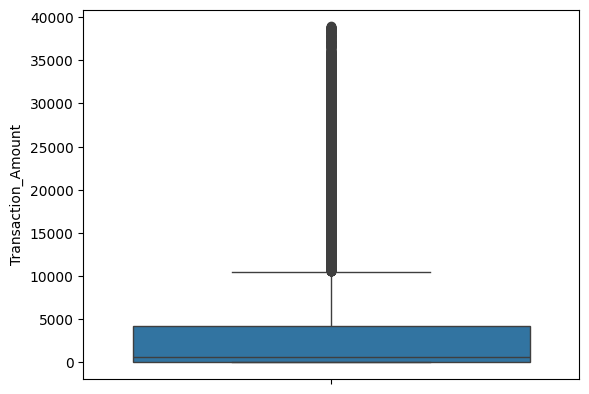

In [123]:
# import seaborn as sns
# sns.boxplot(df['Transaction_Amount'])


In [3]:
# df2

# CLTV CALCULATION


In [ ]:
for i in 

In [5]:
useful_df['CLTV'] = 